# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice
num_mice = merged_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merged_df.loc[merged_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = merged_df[~merged_df["Mouse ID"].isin(duplicate_mice)]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Check the number of mice in the clean DataFrame
num_clean = clean_df["Mouse ID"].nunique()
num_clean

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_dev = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
SEM = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, 
                              "Tumor Volume Variance":var, "Tumor Volume Standard Deviation":std_dev, 
                              "Tumor Volume Std. Error":SEM})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use the aggregation method to produce the same summary statistics in a single line.

agg_sum_stats = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [("Mean Tumor Volume", "mean"), 
                                                                             ("Median Tumor Volume", "median"), 
                                                                             ("Tumor Volume Variance", "var"), 
                                                                             ("Tumor Volume Standard Deviation", "std"),
                                                                             ("Tumor Volume Std. Error", "sem")] })

agg_sum_stats

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                                      
             Tumor Volume Standard Deviation Tumor Volume Std. Error  
Drug Regimen                                                          
Capomulin                           4.994774                0.329346  
Ceftamin                            6.268188                0.469821  
Infubinol                           6.567243                0.492236  
Ketapril                            8.279709                0.603860  
Naftisol                            8.134708                0.596466  
Placebo                             7.821003                0.581331  
Propriva                            6.622085                0.544332  
Ramicane                            4.846308                0.320955  
Stelasyn                            7.710419                0.573111  
Zoniferol                           6.966589                0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Treated'>

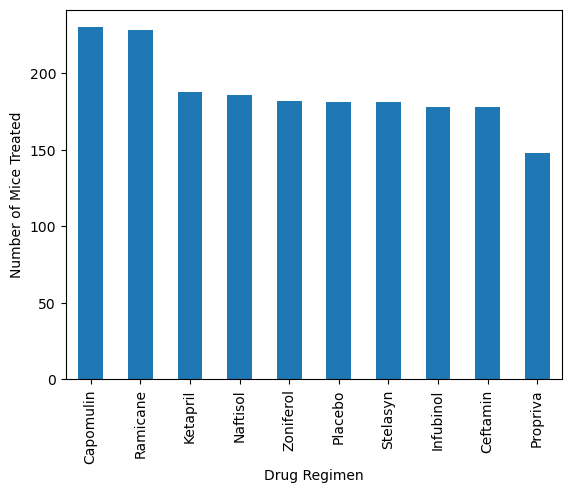

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
num_mice_by_regimen = clean_df["Drug Regimen"].value_counts()
pandas_bar = num_mice_by_regimen.plot.bar()
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Mice Treated")
pandas_bar

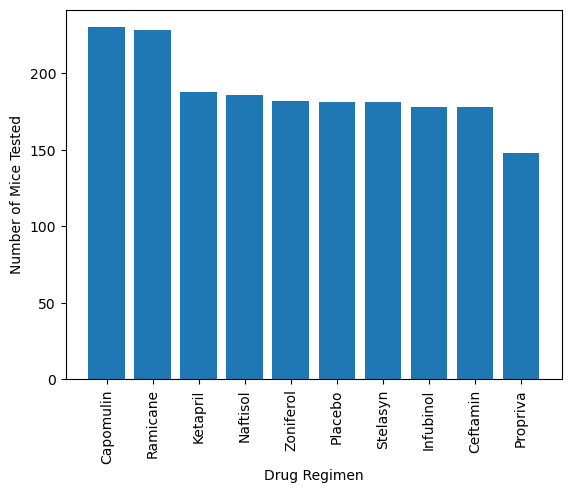

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
x_axis = num_mice_by_regimen.index

plt.bar(x_axis, num_mice_by_regimen)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:ylabel='Sex'>

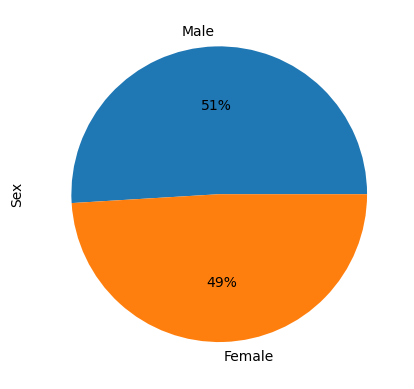

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df["Sex"].value_counts()
pandas_pie = mice_sex.plot(kind="pie", y=mice_sex, autopct='%1.0f%%')
pandas_pie

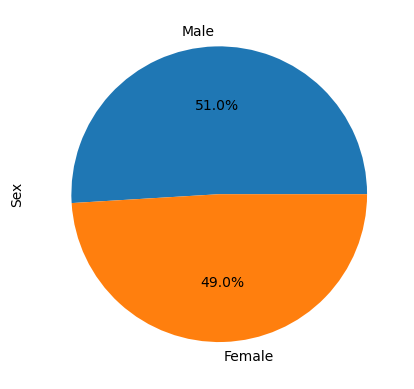

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, labels=mice_sex.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tumor = clean_df.groupby(["Mouse ID"]).max()
mouse_tumor = mouse_tumor.reset_index()
merged_data = mouse_tumor[["Mouse ID", "Timepoint"]].merge(clean_df,on=["Mouse ID", "Timepoint"])

# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in drugs:  
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    
    tumor_vol_data.append(merged_data[merged_data["Drug Regimen"]==drug]["Tumor Volume (mm3)"])

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


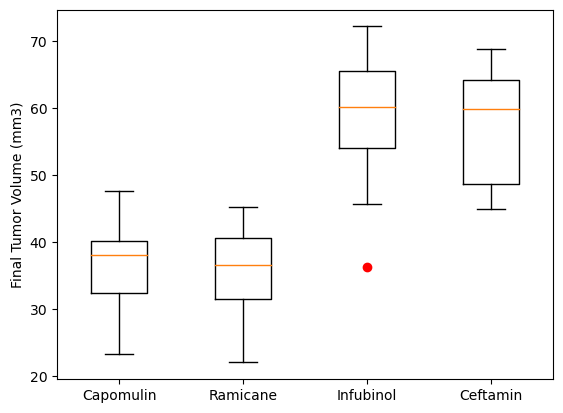

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=drugs, sym="r")
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

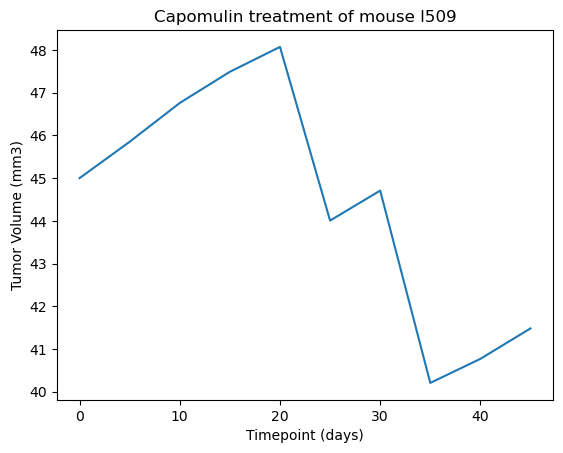

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509")]

plt.plot(cap_mouse_df["Timepoint"], cap_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

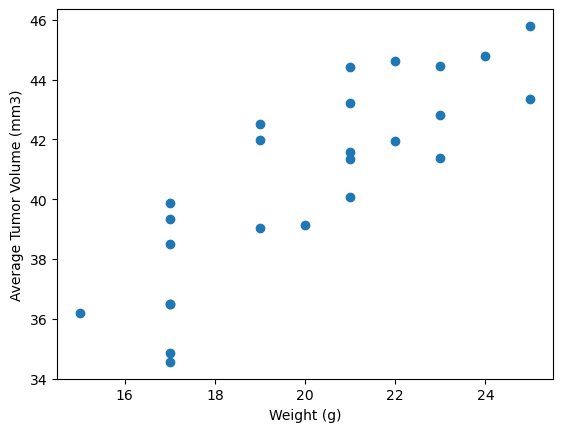

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()
plt.scatter(cap_regimen_df["Weight (g)"], cap_regimen_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


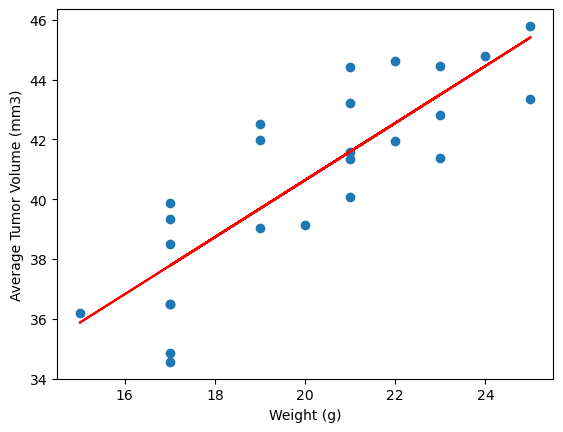

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_regimen_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()

correlation = st.pearsonr(cap_regimen_df["Weight (g)"], cap_regimen_df["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, SEM = st.linregress(cap_regimen_df["Weight (g)"], cap_regimen_df["Tumor Volume (mm3)"])

y = cap_regimen_df["Weight (g)"]*slope+intercept

plt.scatter(cap_regimen_df["Weight (g)"], cap_regimen_df["Tumor Volume (mm3)"])
plt.plot(cap_regimen_df["Weight (g)"], y, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()